# 분류모델 만들기

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error    # 실제 오차 계산

In [1]:
# 데이터 준비

from sklearn.datasets import load_digits

digits_dataset = load_digits()

In [29]:
print(digits_dataset['data'].shape)
np.unique(digits_dataset['target'])

(1797, 64)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

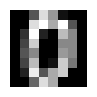

In [34]:
plt.figure(figsize=(1, 1))
plt.imshow(digits_dataset['data'][0].reshape((8, 8)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# 위의 데이터를 사용해서 (분류 0~9)예측 모델 개발

In [13]:
# print( digits_dataset['DESCR'] )
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
# 데이터 준비 - 훈련, 테스트 나누기

X = digits_dataset['data']
y = digits_dataset['target']
y_labels = digits_dataset['target_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# 모델 훈련 
from sklearn.linear_model import LogisticRegression

scores = []
for c in [0.01, 0.1, 1, 10, 100, 1000, 10000]:  # 강한규제(0.01)에서 약한규제(10000)로 규제 조정
    logreg = LogisticRegression(penalty="l2", C=c, max_iter=100000)
    logreg.fit(X_train, y_train)
    tr_score = logreg.score(X_train, y_train)
    te_score = logreg.score(X_test, y_test)
    scores.append( (c, tr_score, te_score) )

In [16]:
scores

[(0.01, 0.9970304380103935, 0.9688888888888889),
 (0.1, 1.0, 0.9644444444444444),
 (1, 1.0, 0.96),
 (10, 1.0, 0.96),
 (100, 1.0, 0.9577777777777777),
 (1000, 1.0, 0.9555555555555556),
 (10000, 1.0, 0.9555555555555556)]

In [ ]:
scores = []
a = np.arange(0.01, 0.11, 0.01)

for c in a:
    logreg = LogisticRegression(penalty="l2", C=c, max_iter=100000)
    logreg.fit(X_train, y_train)
    tr_score = logreg.score(X_train, y_train)
    te_score = logreg.score(X_test, y_test)
    scores.append( (c, tr_score, te_score) )

In [26]:
scores

[(np.float64(0.01), 0.9970304380103935, 0.9688888888888889),
 (np.float64(0.02), 0.9985152190051967, 0.9711111111111111),
 (np.float64(0.03), 0.9992576095025983, 0.9644444444444444),
 (np.float64(0.04), 1.0, 0.9666666666666667),
 (np.float64(0.05), 1.0, 0.9644444444444444),
 (np.float64(0.060000000000000005), 1.0, 0.9644444444444444),
 (np.float64(0.06999999999999999), 1.0, 0.9644444444444444),
 (np.float64(0.08), 1.0, 0.9622222222222222),
 (np.float64(0.09), 1.0, 0.9644444444444444),
 (np.float64(0.09999999999999999), 1.0, 0.9622222222222222)]

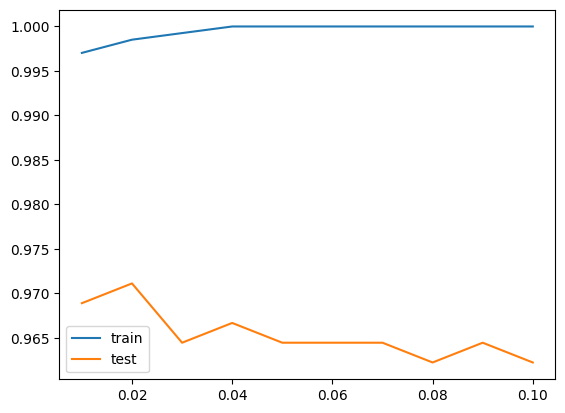

In [28]:
# 시각화를 위해 데이터프레임으로 바꾸기
scores_df = pd.DataFrame(scores, columns=['c', 'train', 'test'])
scores_df

# 시각화
plt.plot(scores_df['c'], scores_df['train'], label='train')
plt.plot(scores_df['c'], scores_df['test'], label='test')
plt.legend()
plt.show()


In [ ]:
logreg2 = LogisticRegression()
logreg2.fit(X, y)

logreg2.score(X, y)

# 선생님과 함께

In [35]:
# 위의 데이터를 사용해서 (분류 0~9)예측 모델 개발

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
# 데이터 준비
X = digits_dataset['data']
y = digits_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [43]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(1.0, 0.96)

In [50]:
scores = []
for c in [0.0001, 0.001, 0.002, 0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(C = c, max_iter=10000)
    logreg.fit(X_train, y_train)

    scores.append((c, 
                   logreg.score(X_train, y_train), 
                   logreg.score(X_test, y_test)))

In [51]:
scores

[(0.0001, 0.9368968077208611, 0.92),
 (0.001, 0.9703043801039347, 0.9577777777777777),
 (0.002, 0.9799554565701559, 0.9622222222222222),
 (0.01, 0.9970304380103935, 0.9688888888888889),
 (0.1, 1.0, 0.9644444444444444),
 (1, 1.0, 0.96),
 (10, 1.0, 0.96),
 (100, 1.0, 0.9577777777777777)]

### 실습2 - star-dataset

In [ ]:
# star-dataset.csv 데이터를 활용해서 예측 모델 만들기
# --> target : "Star Type" 컬럼

# 작업과정
# 1. 데이터프레임으로 데이터 읽기
# 2-1. "Star color", "Spectral Class" 컬럼을 OneHotEncoder를 사용해서 수치화
# 2-2. "Star color", "Spectral Class" 컬럼을 제거
    # 2-1은 정석, 못 하겠다면 2-2로 작업 > 택1하여 작업하기
# 3. X, y 만들기
# 4. 예측 모델 만들기
# 5. 평가

In [100]:
# 1. 데이터프레임으로 데이터 읽기

star_df = pd.read_csv('data-files/star-dataset.csv')
star_df. head(2), star_df.columns

(   Temperature (K)  Luminosity(L/Lo)  ...  Star color  Spectral Class
 0             3068            0.0024  ...         Red               M
 1             3042            0.0005  ...         Red               M
 
 [2 rows x 7 columns],
 Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
        'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
       dtype='object'))

In [54]:
# 2-1. "Star color", "Spectral Class" 컬럼을 OneHotEncoder를 사용해서 수치화
    # D:\Work\workspace\da-basic\ex06.ipynb 파일 참조
from sklearn.preprocessing import OneHotEncoder

In [101]:
star_df["Star color"].unique(), star_df["Star color"].nunique(), \
star_df["Spectral Class"].unique(), star_df["Spectral Class"].nunique()

(array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
        'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
        'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
        'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
        'Blue-White'], dtype=object),
 19,
 array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object),
 7)

In [102]:
star_df[["Spectral Class"]]

,Spectral Class
0,M
1,M
2,M
3,M
4,M
...,...
235,O
236,O
237,A
238,A


In [104]:
OneHotEncoder().fit_transform(star_df[["Spectral Class"]]).toarray()
# ohe2.fit_transform(star_df[["Star color"]]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [116]:
ohe1 = OneHotEncoder()
ohe2 = OneHotEncoder()
star2 = pd.concat((star_df, pd.DataFrame(ohe1.fit_transform(star_df[["Star color"]]).toarray())), axis=1)
# star_df["Spectral Class"] = ohe2.fit_transform(star_df[["Spectral Class"]]).toarray()
star3 = pd.concat((star2, pd.DataFrame(ohe1.fit_transform(star_df[["Spectral Class"]]).toarray())), axis=1)

star3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
 7   0                       240 non-null    float64
 8   1                       240 non-null    float64
 9   2                       240 non-null    float64
 10  3                       240 non-null    float64
 11  4                       240 non-null    float64
 12  5                       240 non-null    float64
 13  6                       240 non-null    float64
 14  7                       240 non-null    fl

In [123]:
# 3. X, y 만들기
from sklearn.model_selection import train_test_split
# X 데이터 선택
X = star3.loc[:, ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 
                    'Star type', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 0, 1, 2, 3, 4, 5, 6]]

# 모든 컬럼 이름을 문자열로 변환
X.columns = X.columns.astype(str)

# y 데이터 선택
y = star3['Star type']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [152]:
# 4. 예측 모델 만들기
from sklearn.linear_model import LogisticRegression

a = np.arange(0.001, 0.11, 0.005)
scores = []
for c in a:
    logreg = LogisticRegression(C = c, max_iter=1000000)
    logreg.fit(X_train, y_train)
    
    scores.append((c, 
                   logreg.score(X_train, y_train), 
                   logreg.score(X_test, y_test)))

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [153]:
# 5. 평가

scores

[(np.float64(0.001), 0.9444444444444444, 0.95),
 (np.float64(0.006), 0.9833333333333333, 0.9833333333333333),
 (np.float64(0.011), 0.9944444444444445, 1.0),
 (np.float64(0.016), 0.9944444444444445, 1.0),
 (np.float64(0.021), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.026000000000000002), 0.9944444444444445, 1.0),
 (np.float64(0.031), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.036000000000000004), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.041), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.046), 0.9888888888888889, 1.0),
 (np.float64(0.051000000000000004), 0.9944444444444445, 1.0),
 (np.float64(0.056), 0.9944444444444445, 1.0),
 (np.float64(0.061), 0.9944444444444445, 1.0),
 (np.float64(0.066), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.07100000000000001), 0.9944444444444445, 1.0),
 (np.float64(0.076), 0.9944444444444445, 1.0),
 (np.float64(0.081), 0.9944444444444445, 0.9833333333333333),
 (np.float64(0.08600000000000001), 0

# 선생님과 함께

In [135]:
# 1. 데이터프레임으로 데이터 읽기

star_df = pd.read_csv('data-files/star-dataset.csv')
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
# 2-2. "Star color", "Spectral Class" 컬럼을 제거
    # 수치형이 아닌 컬럼 제거

print(star_df.columns[-2:])
star_df2 = star_df.drop(star_df.columns[-2:], axis=1)
star_df2.head()

Index(['Star color', 'Spectral Class'], dtype='object')


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


In [140]:
# 3. X, y 만들기

X = star_df2.drop("Star type", axis=1)
y = star_df2['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [159]:
# 2-1. "Star color", "Spectral Class" 컬럼을 OneHotEncoder를 사용해서 수치화
    # 수치형 컬럼을 one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() 
# print( ohe.fit_transform(star_df[star_df.columns[-2:]]) )               # sparse matrix
ohe_values = ohe.fit_transform(star_df[star_df.columns[-2:]]).toarray()   # dense matrix

star_df3 = pd.concat((star_df[star_df.columns[:-2]], pd.DataFrame(ohe_values)), axis=1)
# 뒤 두개 컬럼 버리고, 원핫 인코딩된 컬럼들을 받아들임

In [164]:
# 3. X, y 만들기

X = star_df3.drop("Star type", axis=1).values   # 넘파이 어레이로 작업하는게 정석이다.
y = star_df3['Star type'].values    # 넘파이 어레이로 작업하는게 정석이다.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [165]:
# 4. 예측 모델 만들기 - KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8166666666666667, 0.7)

In [166]:
# 4. 예측 모델 만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, solver = 'lbfgs')   # solver 손실계산
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9888888888888889, 0.9833333333333333)

In [174]:
# 5. 평가

"knn", knn.score(X_train, y_train), knn.score(X_test, y_test), \
"log", logreg.score(X_train, y_train), logreg.score(X_test, y_test)

('knn', 0.8166666666666667, 0.7, 'log', 0.9888888888888889, 0.9833333333333333)

In [176]:
star_df4 = pd.get_dummies(star_df)     # 문자형에 대해서면 원핫인코딩 일괄 처리

In [177]:
X = star_df4.drop("Star type", axis=1).values   # 넘파이 어레이로 작업하는게 정석이다.
y = star_df4['Star type'].values    # 넘파이 어레이로 작업하는게 정석이다.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [178]:
# 4. 예측 모델 만들기 - KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8166666666666667, 0.7)

In [179]:
# 4. 예측 모델 만들기 - LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, solver = 'lbfgs')   # solver 손실계산
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9888888888888889, 0.9833333333333333)

In [180]:
# 5. 평가

"knn", knn.score(X_train, y_train), knn.score(X_test, y_test), \
"log", logreg.score(X_train, y_train), logreg.score(X_test, y_test)

('knn', 0.8166666666666667, 0.7, 'log', 0.9888888888888889, 0.9833333333333333)